2025-10-27 20:16:46.196344: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-27 20:16:46.196564: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-27 20:16:46.230918: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-27 20:16:47.216961: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
X shape: (784, 60000), Y shape: (60000,)
Xtest shape: (784, 10000), Ytest shape: (10000,)


2025-10-27 20:16:48.559289: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-10-27 20:16:48.599784: E tensorflow/core/util/util.cc:131] oneDNN supports DT_UINT8 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


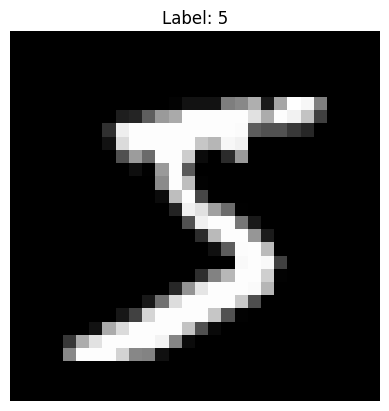

Hidden: 10, Output: 10, LR: 0.01, Epochs: 1000
(10, 784) (10, 1) (10, 10) (10, 1)
Epoch    1 | Loss: 2.323879 | Accuracy: 14.35%
Epoch  100 | Loss: 1.841864 | Accuracy: 42.58%
Epoch  200 | Loss: 1.474966 | Accuracy: 60.95%
Epoch  300 | Loss: 1.197330 | Accuracy: 72.13%
Epoch  400 | Loss: 1.004761 | Accuracy: 76.65%
Epoch  500 | Loss: 0.875591 | Accuracy: 79.06%
Epoch  600 | Loss: 0.783946 | Accuracy: 80.77%
Epoch  700 | Loss: 0.715533 | Accuracy: 82.14%
Epoch  800 | Loss: 0.662518 | Accuracy: 83.38%
Epoch  900 | Loss: 0.620251 | Accuracy: 84.21%
Epoch 1000 | Loss: 0.585816 | Accuracy: 84.98%
Epoch    0 | Cost: 0.693175
Epoch  100 | Cost: 0.685252
Epoch  200 | Cost: 0.680434
Epoch  300 | Cost: 0.677484
Epoch  400 | Cost: 0.675651


/home/devika/Desktop/DataScience_Lab/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Keras model for comparison...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9274 - loss: 0.2453
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9677 - loss: 0.1060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9767 - loss: 0.0744
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9816 - loss: 0.0567
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0445

✅ Test Accuracy (Keras Model): 97.58%


In [1]:
# -------------------------------------------------------
# Assignment 4: Implementing FCNN from Scratch using TensorFlow
# -------------------------------------------------------
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1. Load MNIST dataset
# -------------------------------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# -------------------------------------------------------
# 2–4. Flatten, transpose, normalize training data
# -------------------------------------------------------
U = tf.reshape(x_train, (60000, 784))
X = tf.transpose(U)
X = tf.cast(X, tf.float32) / 255.0
Y = tf.transpose(y_train)

print(f"X shape: {X.shape}, Y shape: {Y.shape}")

# -------------------------------------------------------
# 6–8. Prepare test data
# -------------------------------------------------------
V = tf.reshape(x_test, (10000, 784))
Xtest = tf.transpose(V)
Xtest = tf.cast(Xtest, tf.float32) / 255.0
Ytest = tf.transpose(y_test)

print(f"Xtest shape: {Xtest.shape}, Ytest shape: {Ytest.shape}")

# -------------------------------------------------------
# 10. Display one training image
# -------------------------------------------------------
image_flat = X[:, 0]
label = Y[0]
image_2d = tf.reshape(image_flat, (28, 28))
plt.imshow(image_2d.numpy(), cmap='gray')
plt.title(f"Label: {label.numpy()}")
plt.axis('off')
plt.show()

# -------------------------------------------------------
# 11. Set hyperparameters
# -------------------------------------------------------
p = 10   # hidden layer neurons
q = 10   # output layer neurons (digits 0–9)
alpha = 0.01  # learning rate
epochs = 1000

print(f"Hidden: {p}, Output: {q}, LR: {alpha}, Epochs: {epochs}")

# -------------------------------------------------------
# 12–15. Initialize weights & biases
# -------------------------------------------------------
n = X.shape[0]  # features = 784
m = X.shape[1]  # samples = 60000

# Xavier initialization
W1 = tf.Variable(tf.random.normal((p, n), mean=0.0, stddev=tf.sqrt(1.0 / tf.cast(n, tf.float32))))
B1 = tf.Variable(tf.zeros((p, 1)))
W2 = tf.Variable(tf.random.normal((q, p), mean=0.0, stddev=tf.sqrt(1.0 / tf.cast(p, tf.float32))))
B2 = tf.Variable(tf.zeros((q, 1)))

print(W1.shape, B1.shape, W2.shape, B2.shape)

# -------------------------------------------------------
# 16. Manual Forward & Backward Propagation
# -------------------------------------------------------
def relu(Z):
    return tf.maximum(0.0, Z)

def relu_deriv(Z):
    return tf.cast(Z > 0, tf.float32)

def one_hot(Y, num_classes=10):
    return tf.transpose(tf.one_hot(Y, num_classes))

Y_oh = one_hot(Y, 10)
Y = tf.cast(Y, tf.int64)   # ✅ Fix datatype issue once globally

for epoch in range(1, epochs + 1):
    # Forward propagation
    Z1 = tf.matmul(W1, X) + B1
    A1 = relu(Z1)
    Z2 = tf.matmul(W2, A1) + B2
    A2 = tf.nn.softmax(Z2, axis=0)

    # Backward propagation
    dZ2 = A2 - Y_oh
    dW2 = (1 / m) * tf.matmul(dZ2, tf.transpose(A1))
    dB2 = (1 / m) * tf.reduce_sum(dZ2, axis=1, keepdims=True)
    dA1 = tf.matmul(tf.transpose(W2), dZ2)
    dZ1 = dA1 * relu_deriv(Z1)
    dW1 = (1 / m) * tf.matmul(dZ1, tf.transpose(X))
    dB1 = (1 / m) * tf.reduce_sum(dZ1, axis=1, keepdims=True)

    # Parameter update
    W1.assign_sub(alpha * dW1)
    B1.assign_sub(alpha * dB1)
    W2.assign_sub(alpha * dW2)
    B2.assign_sub(alpha * dB2)

    # Monitor training progress
    if epoch % 100 == 0 or epoch == 1:
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.transpose(Y_oh), logits=tf.transpose(Z2)))
        preds = tf.argmax(A2, axis=0)
        acc = tf.reduce_mean(tf.cast(preds == Y, tf.float32)) * 100
        print(f"Epoch {epoch:4d} | Loss: {loss.numpy():.6f} | Accuracy: {acc.numpy():.2f}%")

# -------------------------------------------------------
# 17. Automatic Differentiation using GradientTape (Demo)
# -------------------------------------------------------
X_demo = tf.random.normal((4, 10))
Y_demo = tf.cast(tf.random.uniform((1, 10), maxval=2, dtype=tf.int32), tf.float32)

W1 = tf.Variable(tf.random.normal((3, 4), stddev=0.01))
B1 = tf.Variable(tf.zeros((3, 1)))
W2 = tf.Variable(tf.random.normal((1, 3), stddev=0.01))
B2 = tf.Variable(tf.zeros((1, 1)))

for epoch in range(500):
    with tf.GradientTape() as tape:
        Z1 = tf.matmul(W1, X_demo) + B1
        A1 = tf.nn.relu(Z1)
        Z2 = tf.matmul(W2, A1) + B2
        A2 = tf.sigmoid(Z2)
        cost = -tf.reduce_mean(Y_demo * tf.math.log(A2 + 1e-8) + (1 - Y_demo) * tf.math.log(1 - A2 + 1e-8))
    grads = tape.gradient(cost, [W1, B1, W2, B2])
    for param, grad in zip([W1, B1, W2, B2], grads):
        param.assign_sub(alpha * grad)
    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Cost: {cost.numpy():.6f}")

# -------------------------------------------------------
# 18–19. Predicting on Test Set using Keras Model (for comparison)
# -------------------------------------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
Y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

print("\nTraining Keras model for comparison...")
model.fit(x_train.reshape(-1, 784) / 255.0, Y_train_onehot, epochs=5, batch_size=32, verbose=1)

loss, accuracy = model.evaluate(x_test.reshape(-1, 784) / 255.0, Y_test_onehot, verbose=0)
print(f"\n✅ Test Accuracy (Keras Model): {accuracy * 100:.2f}%")
